In [6]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

# Load data
df = pd.read_csv('marketing_AB.csv')

# Check for missing values & data types
print("Missing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

# Drop unnecessary index column if present
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Ensure 'converted' is boolean
df['converted'] = df['converted'].astype(bool)

# Verify test groups
print("\nTest group counts:")
print(df['test group'].value_counts())

Missing values:
 Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

Data types:
 Unnamed: 0        int64
user id           int64
test group       object
converted          bool
total ads         int64
most ads day     object
most ads hour     int64
dtype: object

Test group counts:
test group
ad     564577
psa     23524
Name: count, dtype: int64


In [7]:
# Calculate conversion rates
conv_rates = df.groupby('test group')['converted'].mean()
print("\nConversion Rates:\n", conv_rates)

# Sample sizes and conversions
n_ad = df[df['test group'] == 'ad'].shape[0]
n_psa = df[df['test group'] == 'psa'].shape[0]
conv_ad = df[(df['test group'] == 'ad') & df['converted']].shape[0]
conv_psa = df[(df['test group'] == 'psa') & df['converted']].shape[0]

# Two-proportion Z-test
z_stat, p_val = proportions_ztest(
    count=[conv_ad, conv_psa],
    nobs=[n_ad, n_psa],
    alternative='two-sided'
)

print(f"\nZ-statistic: {z_stat:.3f}, p-value: {p_val:.4f}")

# Significance at α = 0.05
alpha = 0.05
if p_val < alpha:
    print("✅ **Reject H₀:** Ads significantly impact conversion.")
else:
    print("❌ **Fail to reject H₀:** No significant difference.")


Conversion Rates:
 test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64

Z-statistic: 7.370, p-value: 0.0000
✅ **Reject H₀:** Ads significantly impact conversion.


### **Conversion Rates by Day**

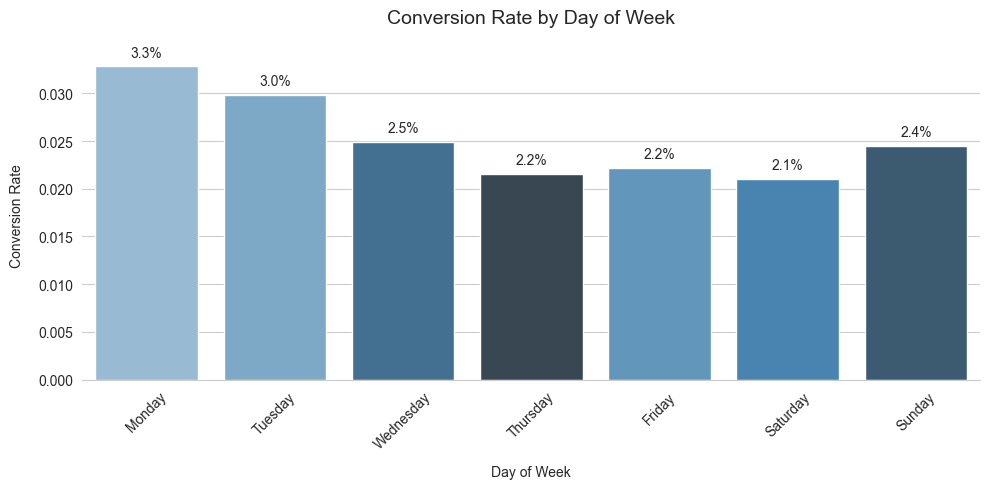

In [13]:
# Set style for better aesthetics
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x='most ads day', 
    y='converted', 
    hue='most ads day',  # Added to properly use palette
    data=df, 
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
    errorbar=None,  # No confidence intervals
    palette="Blues_d",  # Color gradient
    legend=False  # Disable legend since hue is only for palette
)

# Customize the plot
plt.title("Conversion Rate by Day of Week", pad=20, fontsize=14)
plt.xlabel("Day of Week", labelpad=10)
plt.ylabel("Conversion Rate", labelpad=10)
plt.xticks(rotation=45)

# Add value labels on top of each bar (formatted as percentages)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=10)

# Remove unnecessary spines for cleaner look
sns.despine(left=True)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

### **Conversion Rates by Hour**

C:\Users\hp\AppData\Local\Temp\ipykernel_10780\2819851610.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


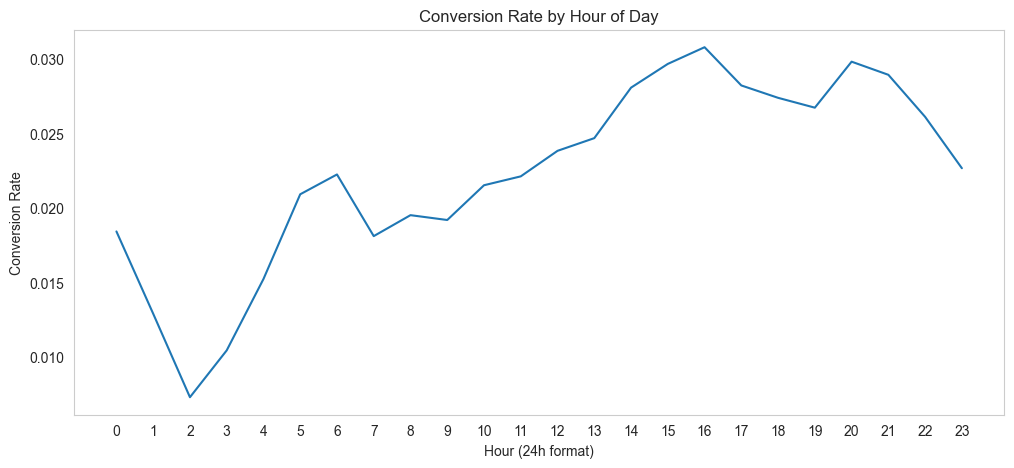

In [14]:
plt.figure(figsize=(12, 5))
sns.lineplot(
    x='most ads hour', 
    y='converted', 
    data=df,
    errorbar=None,
    ci=None
)
plt.title("Conversion Rate by Hour of Day")
plt.xlabel("Hour (24h format)")
plt.ylabel("Conversion Rate")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

In [11]:
avg_order_value = 100  # Example assumption
incremental_conv = (conv_rates['ad'] - conv_rates['psa']) * n_ad
incremental_revenue = incremental_conv * avg_order_value

print(f"\nEstimated Incremental Revenue: ${incremental_revenue:,.2f}")


Estimated Incremental Revenue: $434,298.21
